In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize
import dlsfunctions as dls

In [2]:
data = np.loadtxt('contin_test_data_set_1.txt', encoding='latin1')

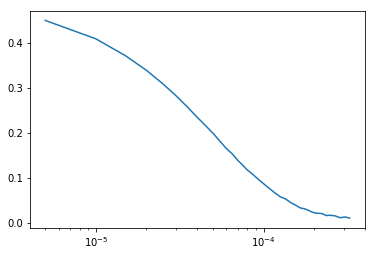

In [3]:
time = data[:,0]
intensity = data[:,1]

plt.semilogx(time, intensity)

In [6]:
p = [6e-5, 0.5, 0]

In [7]:
popt, pcov = scipy.optimize.curve_fit(dls.single_exponential_fit, time, intensity, p0=p)

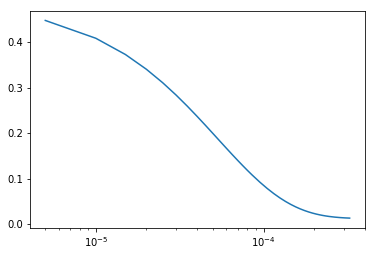

In [8]:
c = popt[0]
const = popt[1]
b = popt[2]

least_square_fit = dls.single_exponential_fit(time, c, const, b)
plt.semilogx(time, least_square_fit)

In [9]:
import initialization_data as init

In [11]:
n = init.n
lambda_0 = init.lambda_0
theta = init.angle
eta = init.eta
k_b = init.k_b
temp = init.t

In [12]:
radius = dls.determine_radius(c, n, lambda_0, theta, eta, k_b, temp)

In [13]:
radius

3.972767755833223e-12

In [14]:
time.shape

(37,)

In [69]:
mean = radius*2
sigma = 1e-10

d = np.linspace(1e-13, 1e-11, 20)

f = dls.generate_distribution(d, mean, sigma, 1)

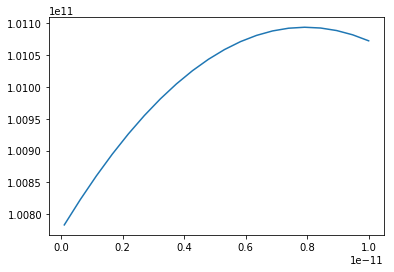

In [70]:
plt.plot(d, f)

In [71]:
beta = 0.5
m = 20

gamma = init.get_gamma()

theta_input = np.append(f, beta)

In [72]:
ndim = 21
nwalkers =100
nsteps = 1000

In [73]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)
sampler = dls.create_sampler(nwalkers, ndim, d, intensity, m, gamma, time)

In [74]:
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.389, 0.378, 0.396, 0.396, 0.391, 0.401, 0.41 , 0.387, 0.391,
       0.381, 0.399, 0.383, 0.377, 0.422, 0.385, 0.371, 0.4  , 0.373,
       0.412, 0.386, 0.395, 0.405, 0.39 , 0.406, 0.386, 0.395, 0.403,
       0.412, 0.418, 0.397, 0.409, 0.377, 0.392, 0.388, 0.383, 0.393,
       0.41 , 0.39 , 0.372, 0.38 , 0.375, 0.395, 0.373, 0.37 , 0.391,
       0.383, 0.424, 0.399, 0.392, 0.377, 0.391, 0.394, 0.388, 0.429,
       0.404, 0.388, 0.406, 0.388, 0.41 , 0.388, 0.394, 0.414, 0.38 ,
       0.397, 0.369, 0.415, 0.398, 0.376, 0.394, 0.387, 0.403, 0.397,
       0.376, 0.399, 0.395, 0.432, 0.395, 0.426, 0.377, 0.365, 0.415,
       0.399, 0.412, 0.399, 0.419, 0.391, 0.415, 0.359, 0.411, 0.402,
       0.417, 0.382, 0.39 , 0.389, 0.394, 0.401, 0.43 , 0.386, 0.383,
       0.402])

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


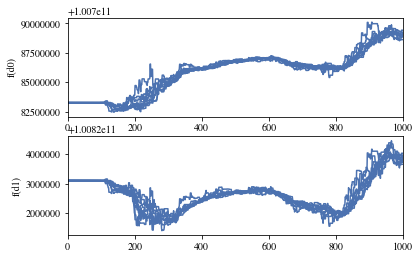

In [75]:
dls.view_burnin_plot(result, 0, 1)

In [76]:
chained_sampler = dls.chain(result, 900, ndim)
samples_df = dls.create_dataframe(chained_sampler, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,1.007890e+11,1.008238e+11,1.010568e+11,1.010737e+11,1.010802e+11,1.010896e+11,1.010927e+11,1.010928e+11,1.010933e+11,1.010881e+11,1.010828e+11,1.010767e+11,1.008615e+11,1.008925e+11,1.009277e+11,1.009533e+11,1.009792e+11,1.010034e+11,1.010233e+11,1.010447e+11


In [77]:
infer = np.zeros(20)
infer[0] = 1.007890e+11
infer[1] = 1.008238e+11
infer[2] = 1.008615e+11
infer[3] = 1.008925e+11
infer[4] = 1.009277e+11
infer[5] = 1.009533e+11
infer[6] = 1.009792e+11
infer[7] = 1.010034e+11
infer[8] = 1.010233e+11
infer[9] = 1.010447e+11
infer[10] = 1.010568e+11
infer[11] = 1.010737e+11
infer[12] = 1.010896e+11
infer[13] = 1.010896e+11
infer[14] = 1.010927e+11
infer[15] = 1.010928e+11
infer[16] = 1.010933e+11
infer[17] = 1.010881e+11
infer[18] = 1.010828e+11
infer[19] = 1.010767e+11

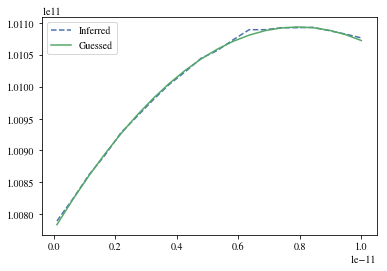

In [79]:
plt.plot(d,infer, '--',label='Inferred')
plt.plot(d, f, label='Guessed')
plt.legend()

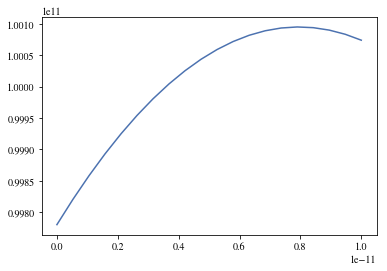

In [115]:
d2 = np.linspace(1e-15, 1e-11, 20)
sigma2 = 1e-11

f2 = dls.generate_distribution(d2, mean, sigma, 1)
plt.plot(d2, f2)

In [116]:
dls.check_distribution_norm(f2, d2[1] - d2[0])

1.0000000000000004